<a href="https://colab.research.google.com/github/Margam9/Recommendation-System-on-different-Genre-songs/blob/main/songs_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [ ]:
 df =  pd.read_csv('songs data set.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [ ]:
df.shape

(18835, 15)

In [ ]:
df[df.duplicated()]

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
173,Sex on Fire,81,203346,0.00172,0.542,0.905,0.010400,9,0.1360,-5.653,1,0.0540,153.398,4,0.374
179,Use Somebody,79,230760,0.00552,0.276,0.715,0.000417,0,0.2010,-5.356,1,0.0432,137.028,4,0.173
212,Hips Don't Lie,84,218093,0.28400,0.778,0.824,0.000000,10,0.4050,-5.892,0,0.0712,100.024,4,0.756
414,Hotel California - Remastered,83,391376,0.00574,0.579,0.508,0.000494,2,0.0575,-9.484,1,0.0270,147.125,4,0.609
421,Me and Bobby McGee,69,271333,0.30200,0.453,0.464,0.000060,2,0.1520,-10.960,1,0.0431,93.190,4,0.658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18797,The Time I've Wasted,63,213249,0.79600,0.473,0.250,0.000088,5,0.1010,-11.263,1,0.0304,145.027,4,0.261
18811,Oceans,69,216186,0.27400,0.404,0.480,0.000009,9,0.1320,-8.906,0,0.0303,129.162,3,0.200
18817,Life Is Confusing,64,171413,0.95500,0.373,0.216,0.001050,1,0.0739,-11.410,1,0.0326,129.030,4,0.496
18826,Call It Dreaming,67,231760,0.61000,0.519,0.515,0.000057,5,0.1070,-9.448,1,0.0310,80.329,4,0.714


In [ ]:
new_df = df.drop_duplicates()
new_df

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


In [ ]:
new_df.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,14926.000000,1.492600e+04,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000
mean,48.750904,2.189496e+05,0.270453,0.624514,0.639763,0.092067,5.301152,0.180435,-7.677232,0.631917,0.099419,121.105007,3.952968,0.526967
std,20.379465,6.234080e+04,0.298117,0.158081,0.221756,0.240451,3.592616,0.145097,4.018670,0.482300,0.103546,29.044644,0.316702,0.247758
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.000000,1.839435e+05,0.023600,0.524000,0.496000,0.000000,2.000000,0.093000,-9.389500,0.000000,0.037200,98.125000,4.000000,0.332000
50%,52.000000,2.118455e+05,0.139000,0.636000,0.672000,0.000021,5.000000,0.122000,-6.750500,1.000000,0.054100,120.016000,4.000000,0.527000
75%,63.750000,2.447200e+05,0.458000,0.740000,0.818000,0.005105,8.000000,0.224000,-4.991000,1.000000,0.113000,139.940750,4.000000,0.727750
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


<AxesSubplot:>

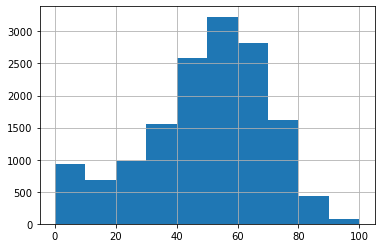

In [ ]:
new_df['song_popularity'].hist()

<AxesSubplot:>

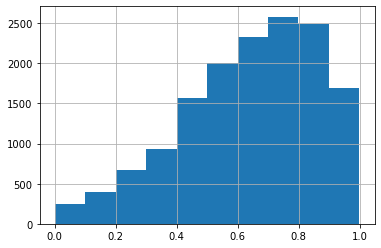

In [ ]:
new_df['energy'].hist()

<AxesSubplot:>

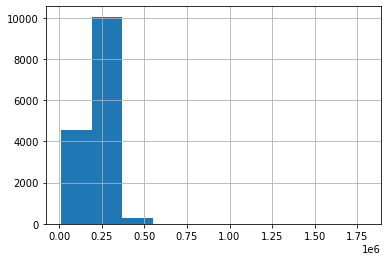

In [ ]:
new_df['song_duration_ms'].hist()

<AxesSubplot:>

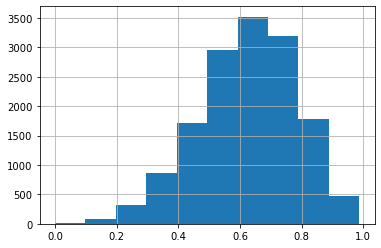

In [ ]:
new_df['danceability'].hist()

<AxesSubplot:>

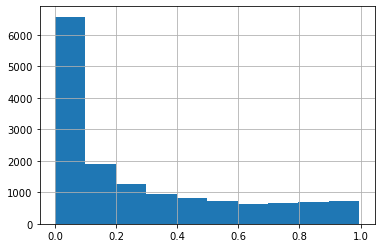

In [ ]:
new_df['acousticness'].hist()

In [ ]:
new_df.skew()

song_popularity    -0.563105
song_duration_ms    3.399724
acousticness        0.992919
danceability       -0.392621
energy             -0.601501
instrumentalness    2.664404
key                -0.012114
liveness            2.216798
loudness           -1.873639
audio_mode         -0.547108
speechiness         2.409166
tempo               0.431470
time_signature     -4.803928
audio_valence      -0.023171
dtype: float64

In [ ]:
new_df.corr()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
song_popularity,1.000000,-0.007766,-0.031658,0.056415,-0.016468,-0.093032,-0.003878,-0.038553,0.052114,0.008824,-0.001971,-0.029560,0.023307,-0.043963
song_duration_ms,-0.007766,1.000000,-0.113314,-0.089338,0.096375,-0.024850,-0.006749,0.020757,0.027837,-0.028056,-0.079438,0.013608,0.004080,-0.069763
acousticness,-0.031658,-0.113314,1.000000,-0.171859,-0.679235,0.179259,-0.000632,-0.085242,-0.569681,0.059443,-0.085435,-0.144736,-0.151180,-0.126915
danceability,0.056415,-0.089338,-0.171859,1.000000,0.053657,-0.124926,0.007599,-0.094373,0.173495,-0.099039,0.200715,-0.127313,0.136211,0.350012
energy,-0.016468,0.096375,-0.679235,0.053657,1.000000,-0.221755,0.014653,0.175979,0.765706,-0.049040,0.072138,0.182517,0.143516,0.315023
instrumentalness,-0.093032,-0.024850,0.179259,-0.124926,-0.221755,1.000000,-0.008496,-0.039821,-0.398912,-0.018852,-0.076705,-0.041032,-0.068656,-0.197783
key,-0.003878,-0.006749,-0.000632,0.007599,0.014653,-0.008496,1.000000,-0.003254,0.008002,-0.174955,0.028565,-0.005033,-0.008750,0.023626
liveness,-0.038553,0.020757,-0.085242,-0.094373,0.175979,-0.039821,-0.003254,1.000000,0.111716,-0.001729,0.094229,0.025681,0.014792,0.016572
loudness,0.052114,0.027837,-0.569681,0.173495,0.765706,-0.398912,0.008002,0.111716,1.000000,-0.055793,0.078418,0.140217,0.112596,0.209803
audio_mode,0.008824,-0.028056,0.059443,-0.099039,-0.049040,-0.018852,-0.174955,-0.001729,-0.055793,1.000000,-0.110686,0.021863,-0.020789,0.002254


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:38<00:00,  2.72s/it]


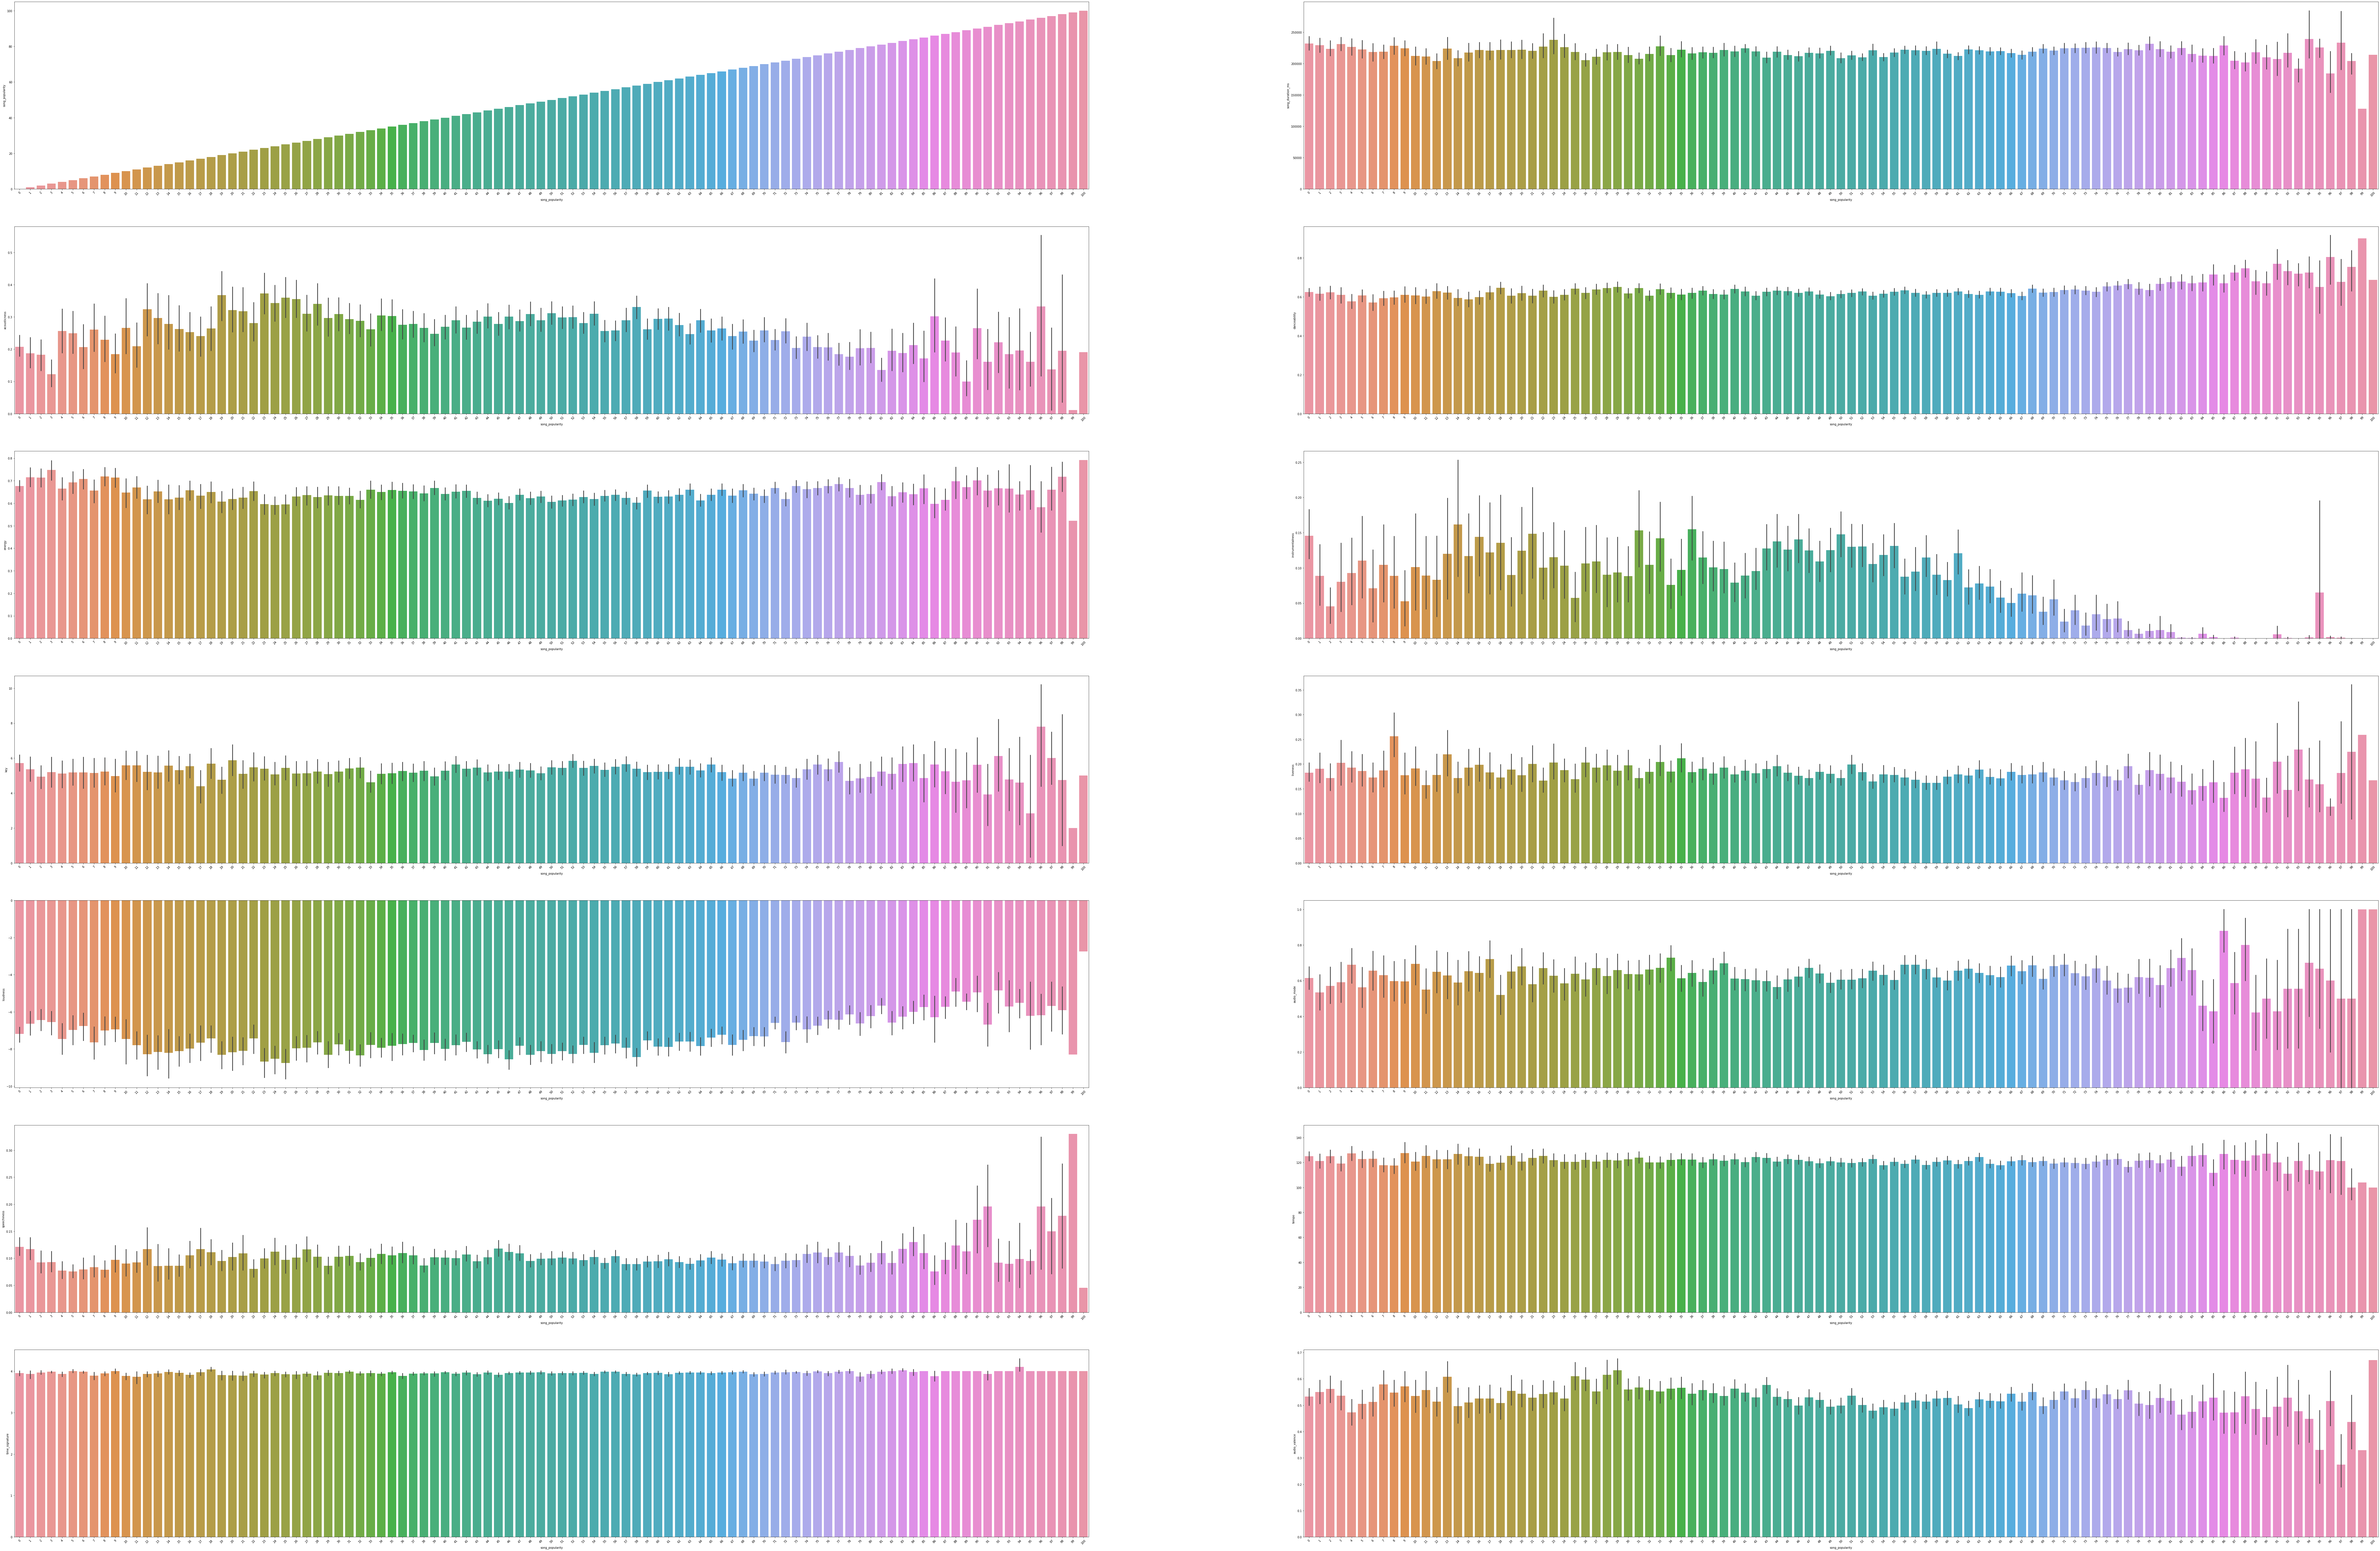

In [ ]:
plt.figure(figsize=(150,100))
for i in tqdm(np.arange(1, len(new_df.columns))):
    plt.subplot(7, 2, i)
    sns.barplot(x=new_df. song_popularity,y=new_df[new_df.columns[i]])
    plt.xticks(rotation=45);
plt.show()

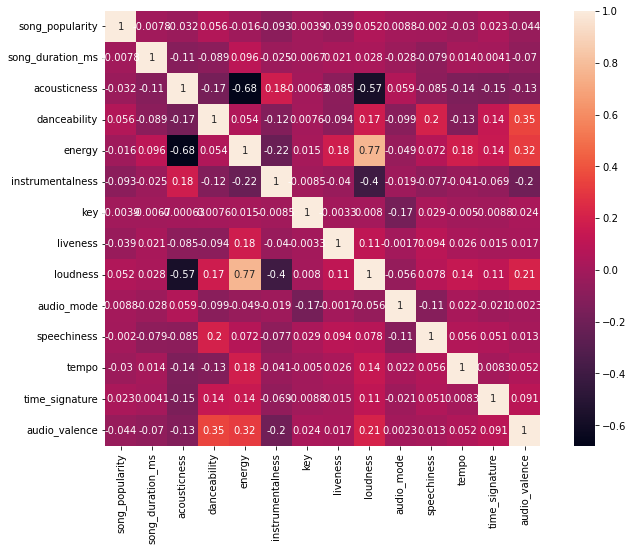

In [ ]:
plt.subplots(figsize=(12, 8))
sns.heatmap(new_df.corr(), annot=True, square=True)
plt.show()

In [ ]:
df1 = new_df.drop(columns=['song_name'])
df1

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


In [ ]:
x = df1
print(x)


       song_popularity  song_duration_ms  acousticness  danceability  energy  \
0                   73            262333      0.005520         0.496   0.682   
1                   66            216933      0.010300         0.542   0.853   
2                   76            231733      0.008170         0.737   0.463   
3                   74            216933      0.026400         0.451   0.970   
4                   56            223826      0.000954         0.447   0.766   
...                ...               ...           ...           ...     ...   
18830               60            159645      0.893000         0.500   0.151   
18831               60            205666      0.765000         0.495   0.161   
18832               23            182211      0.847000         0.719   0.325   
18833               55            352280      0.945000         0.488   0.326   
18834               60            193533      0.911000         0.640   0.381   

       instrumentalness  key  liveness 

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_scale = ss.fit_transform(x)
x_scale

array([[ 1.18991875,  0.6959306 , -0.88871596, ...,  1.58227219,
         0.14851041, -0.21379418],
       [ 0.84642424, -0.03234878, -0.87268145, ..., -0.54569572,
         0.14851041, -0.63357235],
       [ 1.33713069,  0.20506388, -0.87982654, ...,  0.09557996,
         0.14851041, -0.81924347],
       ...,
       [-1.26361349, -0.58933813,  1.93402834, ...,  0.3246488 ,
         0.14851041, -0.97262395],
       [ 0.30664715,  2.13880604,  2.2627693 , ..., -0.51790998,
         0.14851041, -0.82327979],
       [ 0.55200037, -0.40771744,  2.14871631, ..., -1.01967162,
         0.14851041,  0.21809298]])

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=i,n_init=11)
km.fit(x_scale)
y = km.predict(x_scale)
Y = pd.DataFrame(y)
Y.value_counts()

6     2454
1     1773
13    1716
7     1472
11    1272
12    1206
5     1188
3     1054
2      745
4      696
9      507
0      455
10     318
8       70
dtype: int64

In [ ]:
km.inertia_

113319.98925316022

In [ ]:
kint_list=[]
for i in range(5,20):
    km = KMeans(n_clusters=i,n_init=11)
    km.fit(x_scale)
    kint_list.append(km.inertia_)
print(kint_list)

[152681.9380727299, 145395.79908517998, 138683.38928797818, 133158.29482736945, 127886.39346921208, 124398.17620058765, 121435.09136073418, 118539.94082621792, 116488.22753549913, 113319.29928176194, 112150.68209498165, 110086.94918140612, 107774.86600970456, 106750.48962870959, 105453.85153955947]


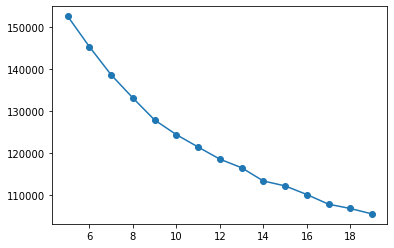

In [ ]:
plt.scatter(range(5,20),kint_list)
plt.plot(range(5,20),kint_list)
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
vectors = cv.fit_transform(new_df['song_name']).toarray()

In [ ]:
vectors[6]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vectors)

In [ ]:
similarity.shape

(14926, 14926)

In [ ]:
similarity[100]

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
sorted(list(enumerate(similarity[3])),reverse=True, key = lambda x:x[1])[1:6]

[(948, 0.816496580927726),
 (8515, 0.7745966692414834),
 (1069, 0.6666666666666669),
 (1707, 0.6666666666666669),
 (4334, 0.6666666666666669)]

In [ ]:
def recommend(song):
    song_index =new_df[new_df['song_name'] == song].index[0]
    distances = similarity[song_index]
    song_list = sorted(list(enumerate(distances)),reverse=True, key = lambda x:x[1])[1:6]

    for i in song_list:
        print(new_df.iloc[i[0]].song_name)


In [ ]:
recommend('Epic')

On the Run
Love No More
Love No More
Love No More
Love on the Weekend


In [ ]:
import pickle

In [ ]:
pickle.dump(new_df.to_dict(),open('songs_dict.pkl','wb'))

In [ ]:
new_df['song_name'].values

array(['Boulevard of Broken Dreams', 'In The End', 'Seven Nation Army',
       ..., 'Sudden Love (Acoustic)', 'Gentle on My Mind', 'Up to Me'],
      dtype=object)

In [ ]:
new_df.to_dict()

{'song_name': {0: 'Boulevard of Broken Dreams',
  1: 'In The End',
  2: 'Seven Nation Army',
  3: 'By The Way',
  4: 'How You Remind Me',
  5: 'Bring Me To Life',
  6: 'Last Resort',
  7: 'Are You Gonna Be My Girl',
  8: 'Mr. Brightside',
  9: 'Sex on Fire',
  10: 'The Middle',
  11: 'Numb',
  12: 'Smooth Criminal',
  13: "Can't Stop",
  14: 'Chop Suey!',
  15: 'Take Me Out',
  16: 'I Miss You',
  17: 'Best of You',
  18: 'I Write Sins Not Tragedies',
  19: 'Kryptonite',
  20: 'The Kill (Bury Me)',
  21: 'Use Somebody',
  22: 'No One Knows',
  23: 'Jerk It Out',
  24: 'Uprising',
  25: 'Hey There Delilah',
  26: 'Blurry',
  27: 'American Idiot',
  28: 'Welcome to the Black Parade',
  29: 'Gives You Hell',
  30: 'All My Life',
  31: 'Like a Stone',
  32: "It's Been Awhile",
  33: 'I Hate Everything About You',
  34: "Rollin' (Air Raid Vehicle)",
  35: 'Fat Lip',
  36: 'The Pretender',
  37: 'Savior',
  38: 'Bodies',
  39: "Sugar, We're Goin Down",
  40: 'Last Nite',
  41: 'Through Glass

In [ ]:
pickle.dump(similarity,open('similarity.pkl','wb'))